In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from category_encoders import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
url = 'https://raw.githubusercontent.com/Tshego04/Oasis-infobyte-projects/refs/heads/main/car%20data.csv'

df = pd.read_csv(url)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.shape

(301, 9)

In [5]:
df.columns = df.columns.str.strip()

In [6]:
df.duplicated()
print("Duplicates in the entire DataFrame:", df)

Duplicates in the entire DataFrame:     Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0

In [7]:
df.isna()
print(df)

    Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Selling_type Transmission  Owner  
0         Dealer       Manual      0  
1         Dealer       Manual    

In [8]:
print(df.describe()) 

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


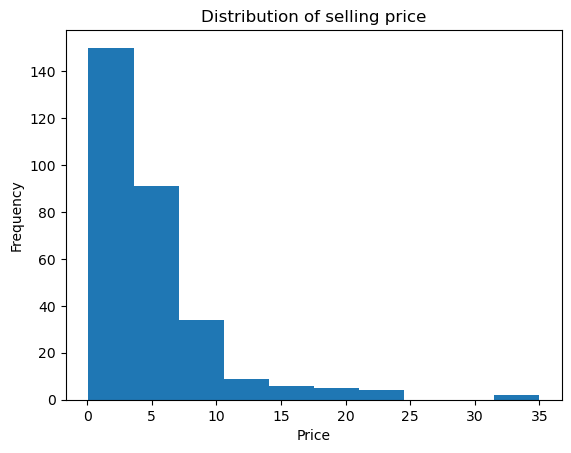

In [9]:
plt.hist(df["Selling_Price"])
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of selling price");

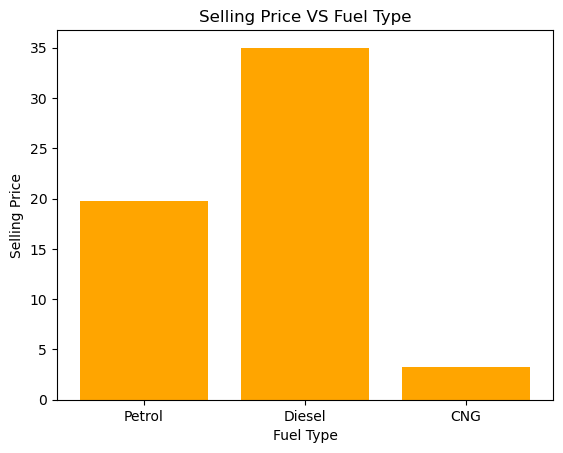

In [10]:
plt.bar(df['Fuel_Type'], df['Selling_Price'], color= 'orange', )
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Selling Price VS Fuel Type')
plt.show()

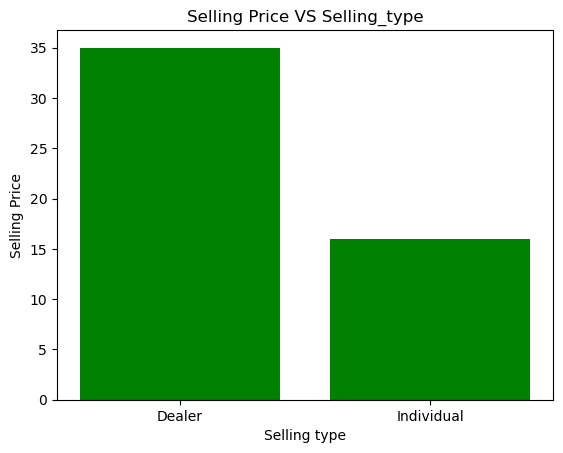

In [11]:
plt.bar(df['Selling_type'], df['Selling_Price'], color= 'Green', )
plt.xlabel('Selling type')
plt.ylabel('Selling Price')
plt.title('Selling Price VS Selling_type')
plt.show()

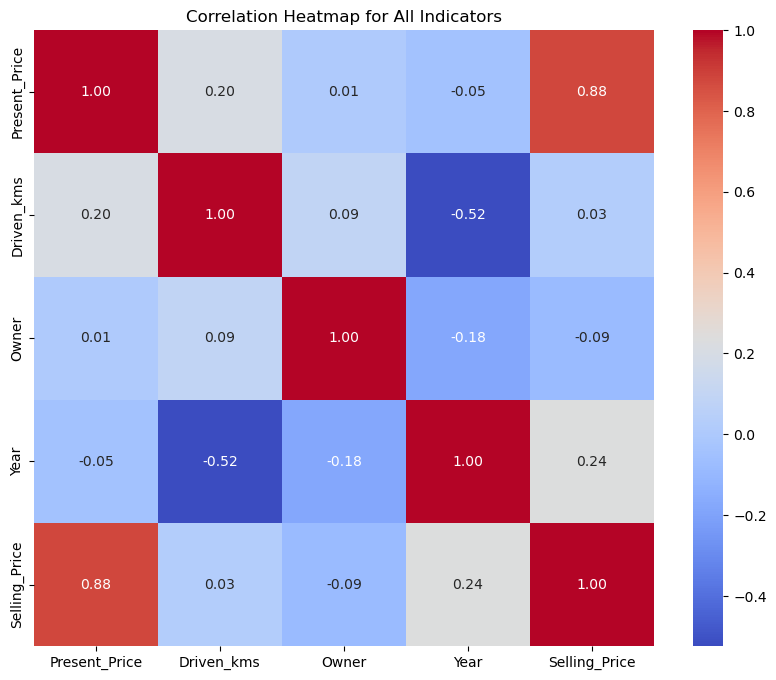

In [12]:
df_columns = ['Present_Price', 'Driven_kms', 'Owner', 'Year', 'Selling_Price']

correlation_matrix = df[df_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title('Correlation Heatmap for All Indicators')

plt.show()

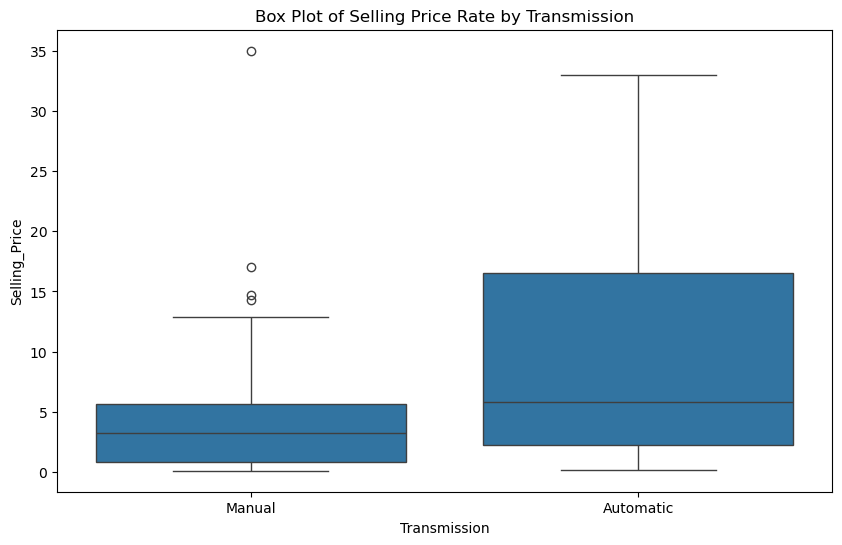

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Selling_Price', data=df)

plt.title('Box Plot of Selling Price Rate by Transmission')
plt.show()

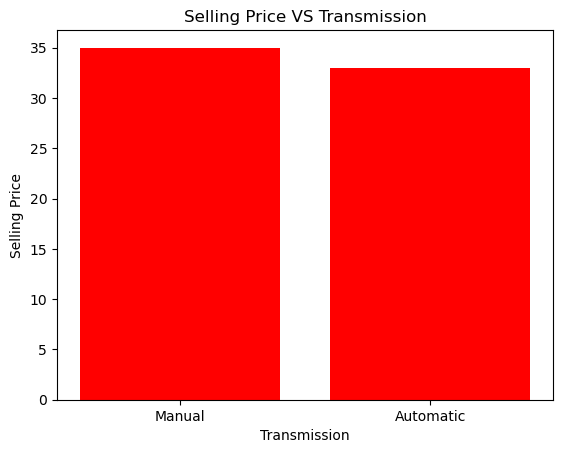

In [14]:
plt.bar(df['Transmission'], df['Selling_Price'], color= 'Red', )
plt.xlabel('Transmission')
plt.ylabel('Selling Price')
plt.title('Selling Price VS Transmission')
plt.show()

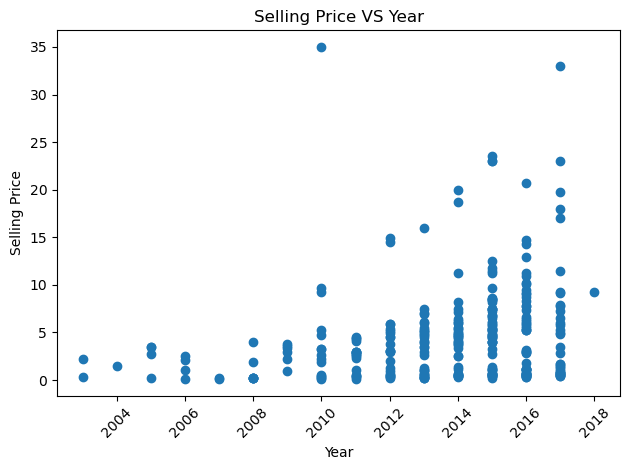

In [15]:
plt.scatter(df['Year'], df['Selling_Price'])
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Selling Price VS Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Define the preprocessor to handle categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Car_Name', 'Fuel_Type', 'Transmission', 'Selling_type']),
        ('num', StandardScaler(), ['Year', 'Present_Price', 'Driven_kms', 'Owner'])  # Scaling numerical features
    ])

In [17]:
X = df.drop(columns=['Selling_Price'])
y = df['Selling_Price']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model =Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('regressor', LinearRegression())  
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Car_Name', 'Fuel_Type',
                                                   'Transmission',
                                                   'Selling_type']),
                                                 ('num', StandardScaler(),
                                                  ['Year', 'Present_Price',
                                                   'Driven_kms', 'Owner'])])),
                ('regressor', LinearRegression())])

In [20]:
y_pred = model.predict(X_test)

In [21]:
print(type(X_train))  
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [22]:
y_pred = model.predict(X_test)

In [23]:
# Calculate MAE, MSE, and RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Absolute Error: 1.1038430037339784
Mean Squared Error: 2.2878245327222015
Root Mean Squared Error: 1.5125556296289409


In [24]:
param_grid = {
    'regressor__fit_intercept': [True, False]  # For LinearRegression: whether to calculate the intercept
}

In [25]:
# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit the model with grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['Car_Name',
                                                                          'Fuel_Type',
                                                                          'Transmission',
                                                                          'Selling_type']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['Year',
                                                                          'Present_Price',
                                                                          'Driven_kms',
                                                                          'Owner'])])),
                                       ('regressor', LinearRegression())]),
             n_jobs=-1, param_grid={'regressor__fit_intercept': [True, False]},
             verbose=1)

In [26]:
# Get the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

Best parameters: {'regressor__fit_intercept': True}
Best cross-validation score: 0.7402758384378882


In [27]:
# Evaluate the tuned model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print evaluation metrics
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R-squared: {r2_score(y_test, y_pred)}')

Mean Squared Error: 2.2878245327222015
R-squared: 0.9006830267012744
